# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [2]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('../predavanja/obdelani-podatki/filmi.csv', index_col='id')

Poglejmo si podatke.

In [9]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [18]:
filmi.sort_values('ocena')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
1213644,Disaster Movie,87,2008,1.9,15.0,80828,14190901.0,"Over the course of one evening, an unsuspectin..."
799949,Velik film,86,2007,2.3,17.0,96182,39739367.0,A comedic satire of films that are large in sc...
185183,Battlefield Earth,118,2000,2.4,9.0,71149,21471685.0,It's the year 3000 A.D.; the Earth is lost to ...
1098327,Dragonball Evolution,85,2009,2.6,45.0,63966,9353573.0,The young warrior Son Goku sets out on a quest...
...,...,...,...,...,...,...,...,...
71562,"Boter, II. del",202,1974,9.0,90.0,950252,57300000.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,84.0,1972591,534858444.0,When the menace known as the Joker emerges fro...
68646,Boter,175,1972,9.2,100.0,1372528,134966411.0,The aging patriarch of an organized crime dyna...


Poberite stolpec ocen.

In [25]:
ocena = filmi['ocena']

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [23]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [28]:
ocena_zaokrozena = round(ocena)

Dodajte zaokrožene vrednosti v podatke.

In [32]:
filmi['ocena_zaokrozena'] = ocena_zaokrozena
filmi.tail(3)

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,ocena_zaokrozena
id,,,,,,,,,
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...,7.0
6644200,A Quiet Place,90,2018,7.7,82.0,216675,188024361.0,"In a post-apocalyptic world, a family is force...",8.0
7784604,Hereditary,127,2018,7.3,87.0,90642,44069456.0,"After the family matriarch passes away, a grie...",7.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [34]:
filmi.drop(columns='ocena_zaokrozena')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


In [35]:
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,rounded value,rounded_value
id,,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0,8.0
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,8.0,8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0,8.0
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0,8.0
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0,8.0


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [37]:
filmi_simple_view = filmi[['naslov','leto','glasovi']]
filmi_simple = filmi_simple_view.copy()
filmi_simple['ocena_zaokrozena'] = ocena_zaokrozena
filmi_simple

,naslov,leto,glasovi,ocena_zaokrozena
id,,,,
12349,The Kid,1921,90443,8.0
13442,"Nosferatu, simfonija groze",1922,77975,8.0
15864,Zlata mrzlica,1925,85136,8.0
17136,Metropolis,1927,136601,8.0
17925,General,1926,68196,8.0
...,...,...,...,...
5813916,Dag II,2016,98201,9.0
5988370,Reis,2017,71685,2.0
6294822,Zamolčani dokumenti,2017,89674,7.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [38]:
before = filmi['leto'] < 1930
after = filmi['leto'] > 2017
filmi[before | after]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,ocena_zaokrozena
id,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0
...,...,...,...,...,...,...,...,...,...
5164214,Oceanovih 8,110,2018,6.3,61.0,91163,139377762.0,Debbie Ocean gathers an all-female crew to att...,6.0
5164432,"Z ljubeznijo, Simon",110,2018,7.7,72.0,62350,40826341.0,Simon Spier keeps a huge secret from his famil...,8.0
5463162,Deadpool 2,119,2018,7.9,66.0,279452,318490305.0,Foul-mouthed mutant mercenary Wade Wilson (AKA...,8.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [39]:
def short_name(x):
    words = x.split()
    return len(words) <= 2

short_name = filmi['naslov'].apply(short_name)
well_rated = filmi['ocena'] > 8
filmi[short_name & well_rated]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,ocena_zaokrozena
id,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0
21749,Luči velemesta,87,1931,8.5,NaN,138228,19181.0,"With the aid of a wealthy erratic tippler, a d...",8.0
...,...,...,...,...,...,...,...,...,...
3315342,Logan: Wolverine,137,2017,8.1,77.0,512587,226277068.0,"In the near future, a weary Logan cares for an...",8.0
4016934,Služkinja,144,2016,8.1,84.0,67471,2005473.0,A woman is hired as a handmaiden to a Japanese...,8.0
4857264,Contratiempo,106,2016,8.1,NaN,66508,NaN,"While the clock is ticking, with the aid of a ...",8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [40]:
rating_frequency = filmi.groupby('ocena').size()

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


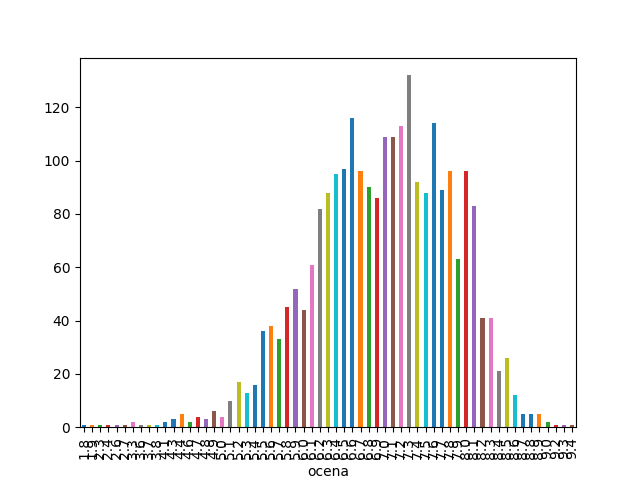

In [41]:
rating_frequency.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<IPython.core.display.Javascript object>


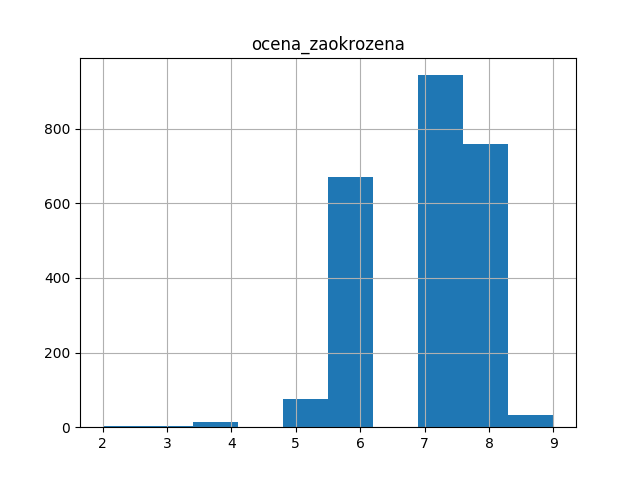

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d248eeb38>]],
      dtype=object)

In [43]:
filmi_simple[['ocena_zaokrozena']].hist()

### Izris povprečne dolžine filma glede na leto

In [53]:
films_by_year = filmi.groupby('leto')
means_by_year = films_by_year.mean()

<IPython.core.display.Javascript object>


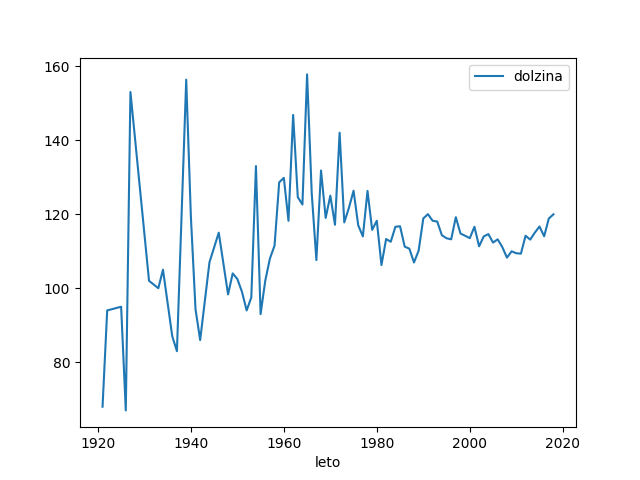

In [48]:
mean_dolzina = means_by_year[['dolzina']]
mean_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<IPython.core.display.Javascript object>


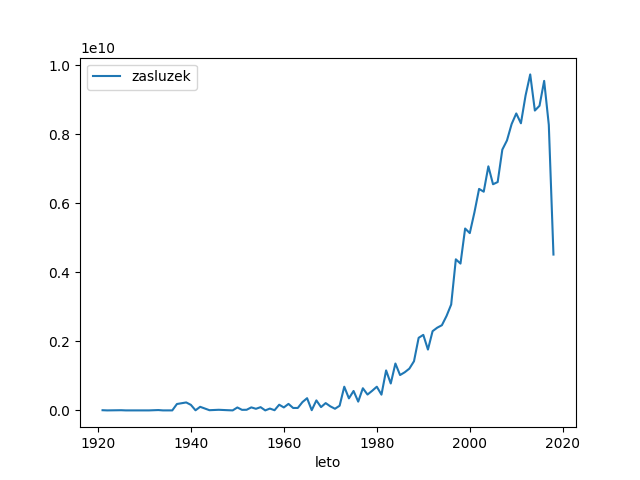

In [49]:
films_by_year.sum()[['zasluzek']].plot()